In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score, accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
df

,EmployeeID,Age,Gender,Education,Department,JobRole,YearsExperience,YearsAtCompany,PerformanceScore,WorkHours,...,ProjectsHandled,TrainingHours,WorkLifeBalance,JobSatisfaction,Absences,Promotions,DistanceFromHome,StressLevel,MonthlyIncome,Attrition
0,1,59.0,Male,Master,Sales,Analyst,11,26,2,54.0,...,9,93,4,5,14,0,5,High,41134.0,Yes
1,2,49.0,Female,Bachelor,IT,Manager,23,9,3,68.0,...,14,44,2,1,16,4,11,High,56765.0,Yes
2,3,NaN,Female,Bachelor,Finance,Analyst,20,5,3,34.0,...,11,21,3,5,1,4,20,High,56924.0,Yes
3,4,28.0,Female,Bachelor,Sales,Analyst,4,11,2,67.0,...,12,42,2,4,10,2,47,Low,30868.0,Yes
4,5,41.0,Female,Master,IT,Engineer,20,2,2,53.0,...,18,53,2,5,18,1,43,High,55532.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,NaN,Male,PhD,Finance,Engineer,13,28,4,56.0,...,9,88,2,5,13,4,35,Low,46760.0,Yes
49996,49997,40.0,Female,Master,HR,Engineer,12,13,5,38.0,...,4,81,2,2,19,3,46,Low,51013.0,Yes
49997,49998,57.0,Female,Bachelor,Finance,Analyst,11,4,1,66.0,...,9,15,1,2,7,3,20,High,39017.0,Yes
49998,49999,51.0,Female,PhD,Sales,Analyst,23,17,4,60.0,...,7,42,4,5,10,4,10,Low,65502.0,No


In [5]:
df.shape

(50000, 21)

In [6]:
df.describe()

,EmployeeID,Age,YearsExperience,YearsAtCompany,PerformanceScore,WorkHours,ProjectsHandled,TrainingHours,WorkLifeBalance,JobSatisfaction,Absences,Promotions,DistanceFromHome,MonthlyIncome
count,50000.000000,47500.000000,50000.00000,50000.000000,50000.000000,47500.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,47500.000000
mean,25000.500000,40.028821,17.01212,14.468420,2.998860,49.606000,10.002460,49.29388,2.506920,3.002460,9.488540,2.006020,24.877420,51500.097053
std,14433.901067,11.220383,10.10947,8.636743,1.414079,11.563246,5.483475,28.89021,1.118292,1.409586,5.760282,1.413883,14.179792,15689.186507
min,1.000000,21.000000,0.00000,0.000000,1.000000,30.000000,1.000000,0.00000,1.000000,1.000000,0.000000,0.000000,1.000000,17004.000000
25%,12500.750000,30.000000,8.00000,7.000000,2.000000,40.000000,5.000000,24.00000,2.000000,2.000000,4.000000,1.000000,13.000000,38419.500000
50%,25000.500000,40.000000,17.00000,14.000000,3.000000,50.000000,10.000000,49.00000,3.000000,3.000000,9.000000,2.000000,25.000000,51474.500000
75%,37500.250000,50.000000,26.00000,22.000000,4.000000,60.000000,15.000000,74.00000,4.000000,4.000000,14.000000,3.000000,37.000000,64630.500000
max,50000.000000,59.000000,34.00000,29.000000,5.000000,69.000000,19.000000,99.00000,4.000000,5.000000,19.000000,4.000000,49.000000,85998.000000


In [7]:
df.value_counts()

EmployeeID  Age   Gender  Education  Department  JobRole   YearsExperience  YearsAtCompany  PerformanceScore  WorkHours  Overtime  ProjectsHandled  TrainingHours  WorkLifeBalance  JobSatisfaction  Absences  Promotions  DistanceFromHome  StressLevel  MonthlyIncome  Attrition
1           59.0  Male    Master     Sales       Analyst   11               26              2                 54.0       No        9                93             4                5                14        0           5                 High         41134.0        Yes          1
2           49.0  Female  Bachelor   IT          Manager   23               9               3                 68.0       Yes       14               44             2                1                16        4           11                High         56765.0        Yes          1
4           28.0  Female  Bachelor   Sales       Analyst   4                11              2                 67.0       Yes       12               42             2 

In [8]:
df.dtypes

EmployeeID            int64
Age                 float64
Gender               object
Education            object
Department           object
JobRole              object
YearsExperience       int64
YearsAtCompany        int64
PerformanceScore      int64
WorkHours           float64
Overtime             object
ProjectsHandled       int64
TrainingHours         int64
WorkLifeBalance       int64
JobSatisfaction       int64
Absences              int64
Promotions            int64
DistanceFromHome      int64
StressLevel          object
MonthlyIncome       float64
Attrition            object
dtype: object

In [9]:
df.isnull().sum()

EmployeeID             0
Age                 2500
Gender                 0
Education              0
Department             0
JobRole                0
YearsExperience        0
YearsAtCompany         0
PerformanceScore       0
WorkHours           2500
Overtime               0
ProjectsHandled        0
TrainingHours          0
WorkLifeBalance        0
JobSatisfaction        0
Absences               0
Promotions             0
DistanceFromHome       0
StressLevel            0
MonthlyIncome       2500
Attrition              0
dtype: int64

# Handling Missing Values

In [10]:
df['Age']

0        59.0
1        49.0
2         NaN
3        28.0
4        41.0
         ... 
49995     NaN
49996    40.0
49997    57.0
49998    51.0
49999    37.0
Name: Age, Length: 50000, dtype: float64

In [11]:
df['Age'].describe()

count    47500.000000
mean        40.028821
std         11.220383
min         21.000000
25%         30.000000
50%         40.000000
75%         50.000000
max         59.000000
Name: Age, dtype: float64

In [12]:
df['Age'].isnull().sum()

np.int64(2500)

In [13]:
df['Age'].fillna(df['Age'].median(), inplace=True)

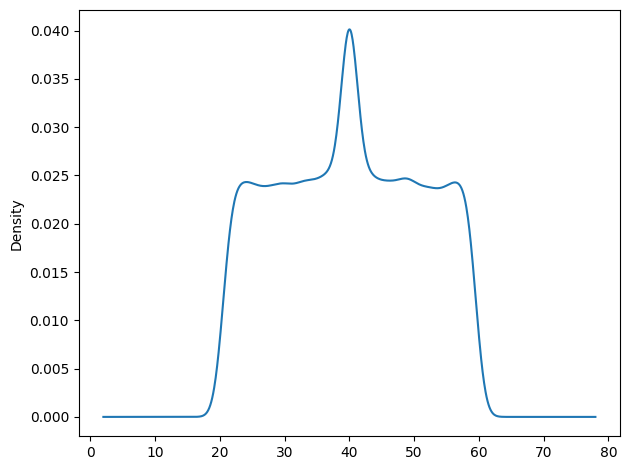

In [14]:
df['Age'].plot(kind='kde')
plt.tight_layout()
plt.show()

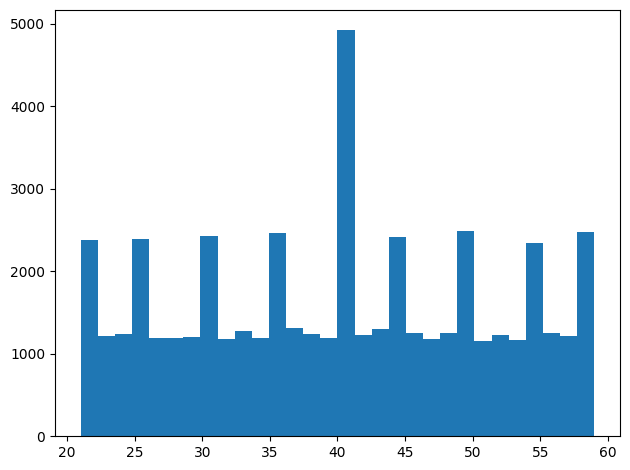

In [15]:
plt.hist(df['Age'],bins=30)
plt.tight_layout()
plt.show()

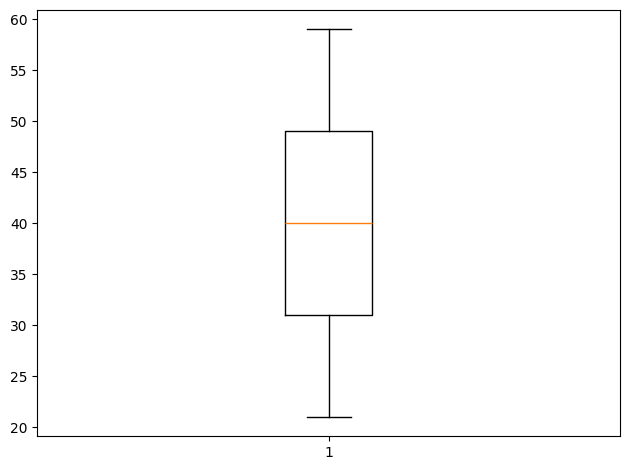

In [16]:
plt.boxplot(df['Age'])
plt.tight_layout()
plt.show()

In [17]:
df['WorkHours']

0        54.0
1        68.0
2        34.0
3        67.0
4        53.0
         ... 
49995    56.0
49996    38.0
49997    66.0
49998    60.0
49999    31.0
Name: WorkHours, Length: 50000, dtype: float64

In [18]:
df['WorkHours'].describe()

count    47500.000000
mean        49.606000
std         11.563246
min         30.000000
25%         40.000000
50%         50.000000
75%         60.000000
max         69.000000
Name: WorkHours, dtype: float64

In [19]:
df['WorkHours'].isnull().sum()

np.int64(2500)

In [20]:
df['WorkHours'].value_counts()

WorkHours
69.0    1259
34.0    1243
51.0    1241
56.0    1238
61.0    1231
52.0    1229
66.0    1216
46.0    1209
68.0    1208
48.0    1206
50.0    1205
49.0    1203
63.0    1202
41.0    1202
65.0    1201
37.0    1199
64.0    1192
58.0    1190
57.0    1189
62.0    1188
32.0    1186
67.0    1185
30.0    1185
40.0    1183
44.0    1180
59.0    1177
55.0    1177
42.0    1175
36.0    1174
53.0    1172
38.0    1165
35.0    1161
33.0    1157
43.0    1155
60.0    1154
39.0    1149
31.0    1143
45.0    1137
54.0    1117
47.0    1117
Name: count, dtype: int64

In [21]:
df['WorkHours'].describe()

count    47500.000000
mean        49.606000
std         11.563246
min         30.000000
25%         40.000000
50%         50.000000
75%         60.000000
max         69.000000
Name: WorkHours, dtype: float64

In [22]:
df['WorkHours'].fillna(df['WorkHours'].mean(), inplace=True)

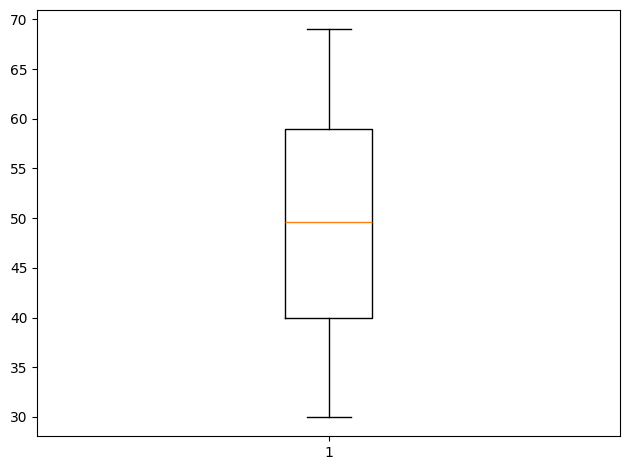

In [23]:
plt.boxplot(df['WorkHours'])
plt.tight_layout()
plt.show()

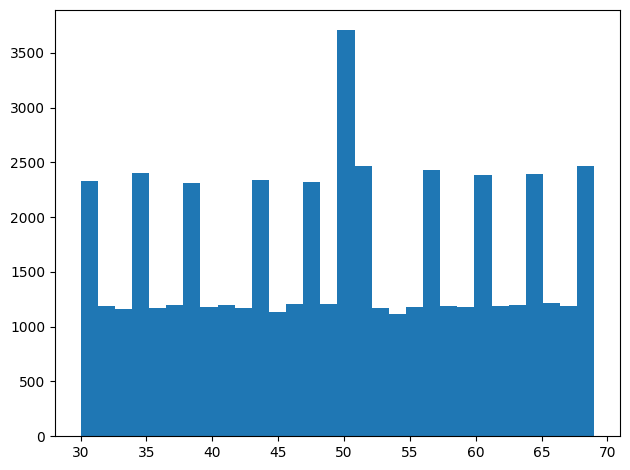

In [24]:
plt.hist(df['WorkHours'],bins=30)
plt.tight_layout()
plt.show()

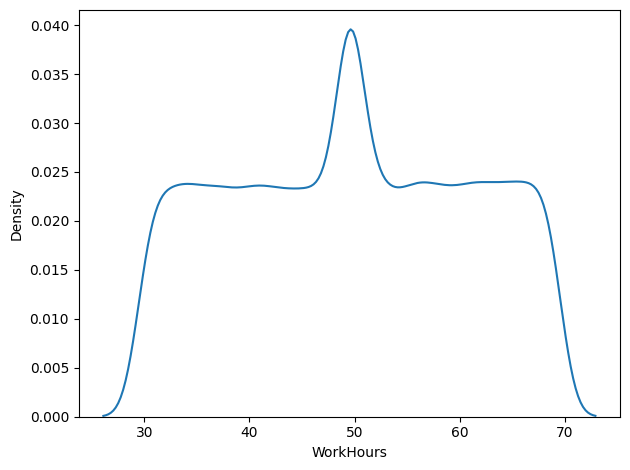

In [25]:
sns.kdeplot(df['WorkHours'])
plt.tight_layout()
plt.show()

In [26]:
df['MonthlyIncome']

0        41134.0
1        56765.0
2        56924.0
3        30868.0
4        55532.0
          ...   
49995    46760.0
49996    51013.0
49997    39017.0
49998    65502.0
49999        NaN
Name: MonthlyIncome, Length: 50000, dtype: float64

In [27]:
df['MonthlyIncome'].isnull().sum()

np.int64(2500)

In [28]:
df['MonthlyIncome'].describe()

count    47500.000000
mean     51500.097053
std      15689.186507
min      17004.000000
25%      38419.500000
50%      51474.500000
75%      64630.500000
max      85998.000000
Name: MonthlyIncome, dtype: float64

In [29]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(), inplace=True)

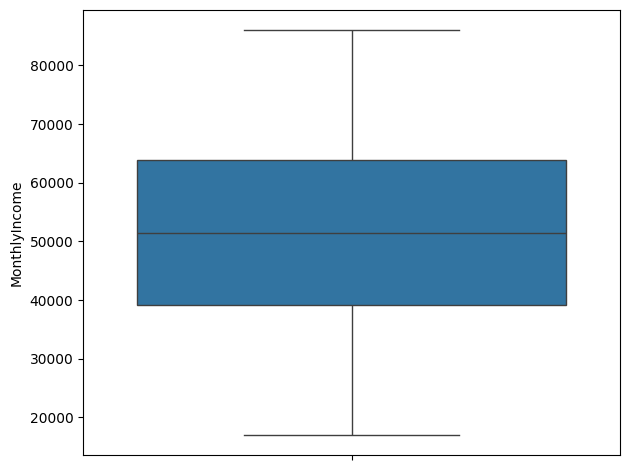

In [30]:
sns.boxplot(df['MonthlyIncome'])
plt.tight_layout()
plt.show()

# Feature Engineering

In [31]:
df['Attrition'].describe()

count     50000
unique        2
top         Yes
freq      39817
Name: Attrition, dtype: object

In [32]:
df['Attrition'].isnull().sum()

np.int64(0)

In [33]:
df['Attrition'].value_counts()

Attrition
Yes    39817
No     10183
Name: count, dtype: int64

In [34]:
df.dtypes

EmployeeID            int64
Age                 float64
Gender               object
Education            object
Department           object
JobRole              object
YearsExperience       int64
YearsAtCompany        int64
PerformanceScore      int64
WorkHours           float64
Overtime             object
ProjectsHandled       int64
TrainingHours         int64
WorkLifeBalance       int64
JobSatisfaction       int64
Absences              int64
Promotions            int64
DistanceFromHome      int64
StressLevel          object
MonthlyIncome       float64
Attrition            object
dtype: object

## Encdoing all the object columns

In [35]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Education', 'Department', 'JobRole', 'Overtime',
       'StressLevel', 'Attrition'],
      dtype='object')

In [36]:
df[['Gender', 'Education', 'Department', 'JobRole', 'Overtime','StressLevel', 'Attrition']]

,Gender,Education,Department,JobRole,Overtime,StressLevel,Attrition
0,Male,Master,Sales,Analyst,No,High,Yes
1,Female,Bachelor,IT,Manager,Yes,High,Yes
2,Female,Bachelor,Finance,Analyst,Yes,High,Yes
3,Female,Bachelor,Sales,Analyst,Yes,Low,Yes
4,Female,Master,IT,Engineer,No,High,Yes
...,...,...,...,...,...,...,...
49995,Male,PhD,Finance,Engineer,Yes,Low,Yes
49996,Female,Master,HR,Engineer,No,Low,Yes
49997,Female,Bachelor,Finance,Analyst,Yes,High,Yes
49998,Female,PhD,Sales,Analyst,No,Low,No


In [37]:
df['Gender'] = df['Gender'].map({
    "Male" : 1,
    "Female" : 0
}).astype(int)

In [38]:
df['Education'] = df['Education'].map({
    "Bachelor" : 0,
    "Master" : 1,
    "PhD" : 2
}).astype(int)

In [39]:
df['Overtime'] = df['Overtime'].map({
    "Yes" : 1,
    "No" : 0
}).astype(int)

In [40]:
df['StressLevel'] = df['StressLevel'].map({
    "Low" : 0,
    "Medium" : 1,
    "High" : 2
}).astype(int)

In [41]:
df['Attrition'] = df['Attrition'].map({
    "Yes" : 1,
    "No" : 0
}).astype(int)

In [42]:
df.select_dtypes(include=['object']).columns

Index(['Department', 'JobRole'], dtype='object')

In [43]:
df = pd.get_dummies(
    df,
    columns=["Department", "JobRole"],
    drop_first=True
)

In [44]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [45]:
df

,EmployeeID,Age,Gender,Education,YearsExperience,YearsAtCompany,PerformanceScore,WorkHours,Overtime,ProjectsHandled,...,Promotions,DistanceFromHome,StressLevel,MonthlyIncome,Attrition,Department_HR,Department_IT,Department_Sales,JobRole_Engineer,JobRole_Manager
0,1,59.0,1,1,11,26,2,54.0,0,9,...,0,5,2,41134.000000,1,False,False,True,False,False
1,2,49.0,0,0,23,9,3,68.0,1,14,...,4,11,2,56765.000000,1,False,True,False,False,True
2,3,40.0,0,0,20,5,3,34.0,1,11,...,4,20,2,56924.000000,1,False,False,False,False,False
3,4,28.0,0,0,4,11,2,67.0,1,12,...,2,47,0,30868.000000,1,False,False,True,False,False
4,5,41.0,0,1,20,2,2,53.0,0,18,...,1,43,2,55532.000000,1,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,40.0,1,2,13,28,4,56.0,1,9,...,4,35,0,46760.000000,1,False,False,False,True,False
49996,49997,40.0,0,1,12,13,5,38.0,0,4,...,3,46,0,51013.000000,1,True,False,False,True,False
49997,49998,57.0,0,0,11,4,1,66.0,1,9,...,3,20,2,39017.000000,1,False,False,False,False,False
49998,49999,51.0,0,2,23,17,4,60.0,0,7,...,4,10,0,65502.000000,0,False,False,True,False,False


# Model Training

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeID        50000 non-null  int64  
 1   Age               50000 non-null  float64
 2   Gender            50000 non-null  int64  
 3   Education         50000 non-null  int64  
 4   YearsExperience   50000 non-null  int64  
 5   YearsAtCompany    50000 non-null  int64  
 6   PerformanceScore  50000 non-null  int64  
 7   WorkHours         50000 non-null  float64
 8   Overtime          50000 non-null  int64  
 9   ProjectsHandled   50000 non-null  int64  
 10  TrainingHours     50000 non-null  int64  
 11  WorkLifeBalance   50000 non-null  int64  
 12  JobSatisfaction   50000 non-null  int64  
 13  Absences          50000 non-null  int64  
 14  Promotions        50000 non-null  int64  
 15  DistanceFromHome  50000 non-null  int64  
 16  StressLevel       50000 non-null  int64 

In [47]:
df = df.drop(columns=["EmployeeID"], errors="ignore")

In [48]:
x = df.drop(columns=["Attrition"])
y = df['Attrition']

In [63]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y,train_size=0.25, random_state=42
)

In [65]:
model = LinearRegression()
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [66]:
y_pred = model.predict(x_test)

In [67]:
r2_score(y_test, y_pred)

0.4228997838777597

In [68]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [69]:
y_pred = model.predict(x_test)

In [70]:
accuracy_score(y_test, y_pred)

0.8906133333333334

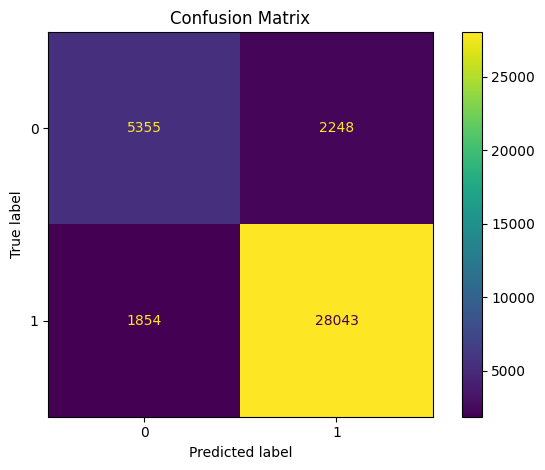

In [71]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

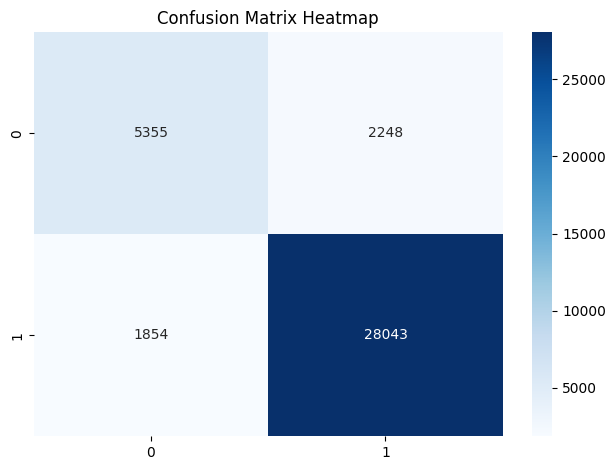

In [74]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

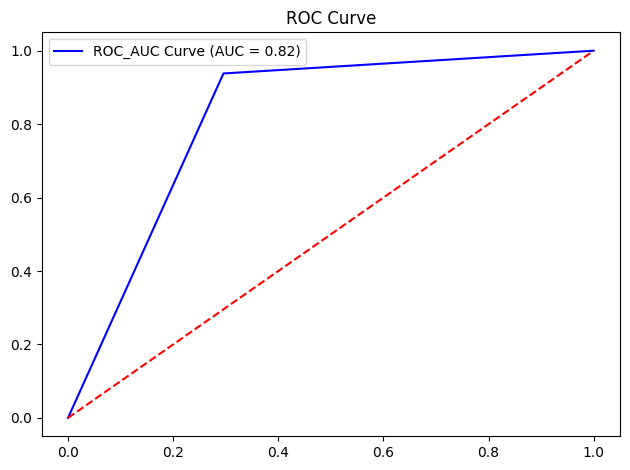

In [73]:
plt.plot(fpr, tpr,color='blue',label=f'ROC_AUC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("ROC Curve")
plt.tight_layout()
plt.legend()
plt.show()